In [54]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google

In [30]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [31]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
# verify the possible null items
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
# confirm if really there is no null values
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [34]:
# input null elements in dataframe test

customers_null = customers

# get 10% of users from customer users mall
get_sample_users = customers_null.sample(frac=0.1)

# add null values in dataframe customers_null
for column in customers.columns:
    customers_null.loc[customers_null.sample(frac=0.1).index, column] = np.nan

In [35]:
customers_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              180 non-null    float64
 1   Gender                  180 non-null    object 
 2   Age                     180 non-null    float64
 3   Annual Income (k$)      180 non-null    float64
 4   Spending Score (1-100)  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [36]:
customers_null.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,Male,19.0,NaN,NaN
1,2.0,NaN,21.0,NaN,81.0
2,3.0,Female,20.0,16.0,6.0
3,4.0,Female,23.0,16.0,77.0
4,NaN,Female,31.0,17.0,40.0


In [37]:
# now there is 20 null values in each column present in test dataframe
customers_null.isnull().sum()

CustomerID                20
Gender                    20
Age                       20
Annual Income (k$)        20
Spending Score (1-100)    20
dtype: int64

In [ ]:
# function to delete drop null element (not recommended)
customers_null.dropna()

In [ ]:
# fill null elements with 0
customers_null.fillna(0)

In [38]:
customers_null.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,180.000000,180.000000,180.000000,180.000000
mean,101.155556,38.444444,60.783333,49.938889
std,58.381219,13.509038,26.577656,25.922783
min,1.000000,18.000000,16.000000,1.000000
25%,50.750000,29.000000,40.000000,33.500000
50%,102.500000,35.500000,61.000000,50.000000
75%,151.250000,48.250000,78.000000,72.000000
max,200.000000,70.000000,137.000000,99.000000


In [40]:
customers_null.fillna(customers_null.mean())
# customers_null.mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.000000,Male,19.0,60.783333,49.938889
1,2.000000,NaN,21.0,60.783333,81.000000
2,3.000000,Female,20.0,16.000000,6.000000
3,4.000000,Female,23.0,16.000000,77.000000
4,101.155556,Female,31.0,17.000000,40.000000
...,...,...,...,...,...
195,196.000000,Female,35.0,120.000000,79.000000
196,197.000000,Female,45.0,126.000000,28.000000
197,198.000000,Male,32.0,126.000000,74.000000
198,199.000000,Male,32.0,137.000000,18.000000


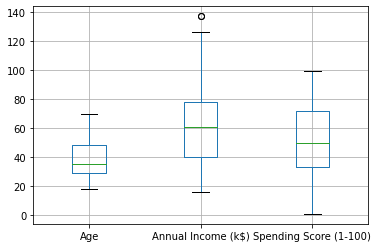

In [45]:
# verify outliers
box_plot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [50]:
# find outliers through Z-score
from scipy import stats
z = np.abs(stats.zscore(customers['Annual Income (k$)'].values))
threshold = 2
result = np.where(z > threshold)

df_salary_outlier = customers.iloc[result[0]]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


In [52]:
df_salary_outlier # all the users with anual salary and possible outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Text(0.5, 1.0, 'Distribution of clients by gender')

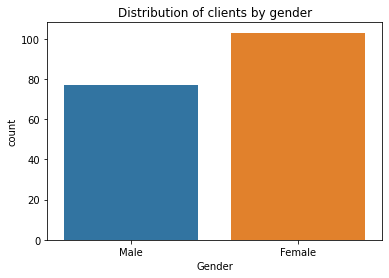

In [55]:
# analyse the distribution of clients by gender
sns.countplot(x='Gender', data=customers)
plt.title('Distribution of clients by gender')

Text(0.5, 0, 'Age')

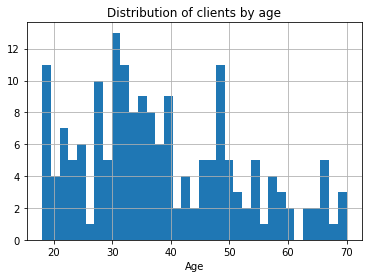

In [56]:
# Divide age in histogram
customers.hist('Age', bins=35) # 'Age' is the column take in dataframe of customers
                               # bin are the number of groups i wanna divide

plt.title('Distribution of clients by age')
plt.xlabel('Age')

In [57]:
cat_df_customers = customers.select_dtypes(include=['object'])

In [59]:
# get by type object(string in dataframe)
cat_df_customers.head()

,Gender
0,Male
1,NaN
2,Female
3,Female
4,Female


# Map

In [80]:
replace_map = {'Gender' : {'Male': 1, 'Female': 2}} # define a map dict
labels = cat_df_customers['Gender'].astype('category').cat.categories.tolist()
replace_map_comp = {'Gender': {k: v for k, v in zip(labels, list(range(1, len(labels) + 1)))}}
labels

['Female', 'Male']

In [73]:
cat_df_customers_replace = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [74]:
cat_df_customers_replace.replace(replace_map_comp, inplace=True) # make the map

In [75]:
cat_df_customers_replace.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,2,19,15,39
1,2,2,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Label Encoder

In [82]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [87]:
cat_df_customers_lc=customers

In [92]:
cat_df_customers_lc['Gender'] = pd.Categorical(cat_df_customers_lc['Gender'])
cat_df_customers_lc.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [93]:
cat_df_customers_lc['Gender'] = cat_df_customers_lc['Gender'].cat.codes
cat_df_customers_lc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [94]:
from sklearn.preprocessing import LabelEncoder

labelEnconder = LabelEncoder()

customers_label = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_label['Gender'] = labelEnconder.fit_transform(customers_label['Gender'])
customers_label.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


# One Hot Encooding

In [96]:
customers_one_hot = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
customers_one_hot = pd.get_dummies(customers_one_hot)
customers_one_hot.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [97]:
customers = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

In [98]:
customers_one_hot = customers
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [100]:
# apply one hot enconding for a unique column
customers_ohe = ohe.fit_transform(customers_one_hot['Gender'].values.reshape(-1, 1)).toarray()
customers_ohe.shape

(200, 2)

In [ ]:
customers_ohe